In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from collections import Counter
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.feature_selection import SelectKBest, chi2

from tensorflow import keras
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras import layers
from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')
#from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
df=pd.read_csv('forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
# Shape of the data
print(df.shape)

(517, 31)


In [4]:

# Data types of the features
print(df.dtypes)

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object


In [5]:
# Statistical summary of the dataset
print(df.describe().T)

          count        mean         std   min    25%     50%     75%      max
FFMC      517.0   90.644681    5.520111  18.7   90.2   91.60   92.90    96.20
DMC       517.0  110.872340   64.046482   1.1   68.6  108.30  142.40   291.30
DC        517.0  547.940039  248.066192   7.9  437.7  664.20  713.90   860.60
ISI       517.0    9.021663    4.559477   0.0    6.5    8.40   10.80    56.10
temp      517.0   18.889168    5.806625   2.2   15.5   19.30   22.80    33.30
RH        517.0   44.288201   16.317469  15.0   33.0   42.00   53.00   100.00
wind      517.0    4.017602    1.791653   0.4    2.7    4.00    4.90     9.40
rain      517.0    0.021663    0.295959   0.0    0.0    0.00    0.00     6.40
area      517.0   12.847292   63.655818   0.0    0.0    0.52    6.57  1090.84
dayfri    517.0    0.164410    0.371006   0.0    0.0    0.00    0.00     1.00
daymon    517.0    0.143133    0.350548   0.0    0.0    0.00    0.00     1.00
daysat    517.0    0.162476    0.369244   0.0    0.0    0.00    

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [8]:
# Number of missing values in each feature
print(df.isnull().sum())

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64


In [9]:
# List of Numerical Variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
df[numerical_features].head()

Number of numerical variables: 28


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
discrete_feature = [feature for feature in numerical_features if len(df[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 21


In [11]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


In [12]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 3 categorical variables

The categorical variables are :

 ['month', 'day', 'size_category']


In [13]:
for var in categorical: 
    
    print(df[var].value_counts())

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64
small    378
large    139
Name: size_category, dtype: int64


In [14]:
for var in categorical: 
    
    print(df[var].value_counts()/np.float64(len(df)))

aug    0.355899
sep    0.332689
mar    0.104449
jul    0.061896
feb    0.038685
jun    0.032882
oct    0.029014
apr    0.017408
dec    0.017408
jan    0.003868
may    0.003868
nov    0.001934
Name: month, dtype: float64
sun    0.183752
fri    0.164410
sat    0.162476
mon    0.143133
tue    0.123791
thu    0.117988
wed    0.104449
Name: day, dtype: float64
small    0.731141
large    0.268859
Name: size_category, dtype: float64


In [15]:
for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

month  contains  12  labels
day  contains  7  labels
size_category  contains  2  labels


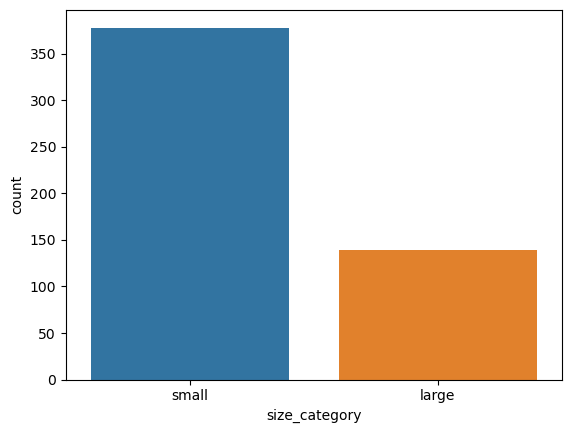

In [16]:
# Visualize the distribution of the target variable
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='size_category', data=df)
plt.show()

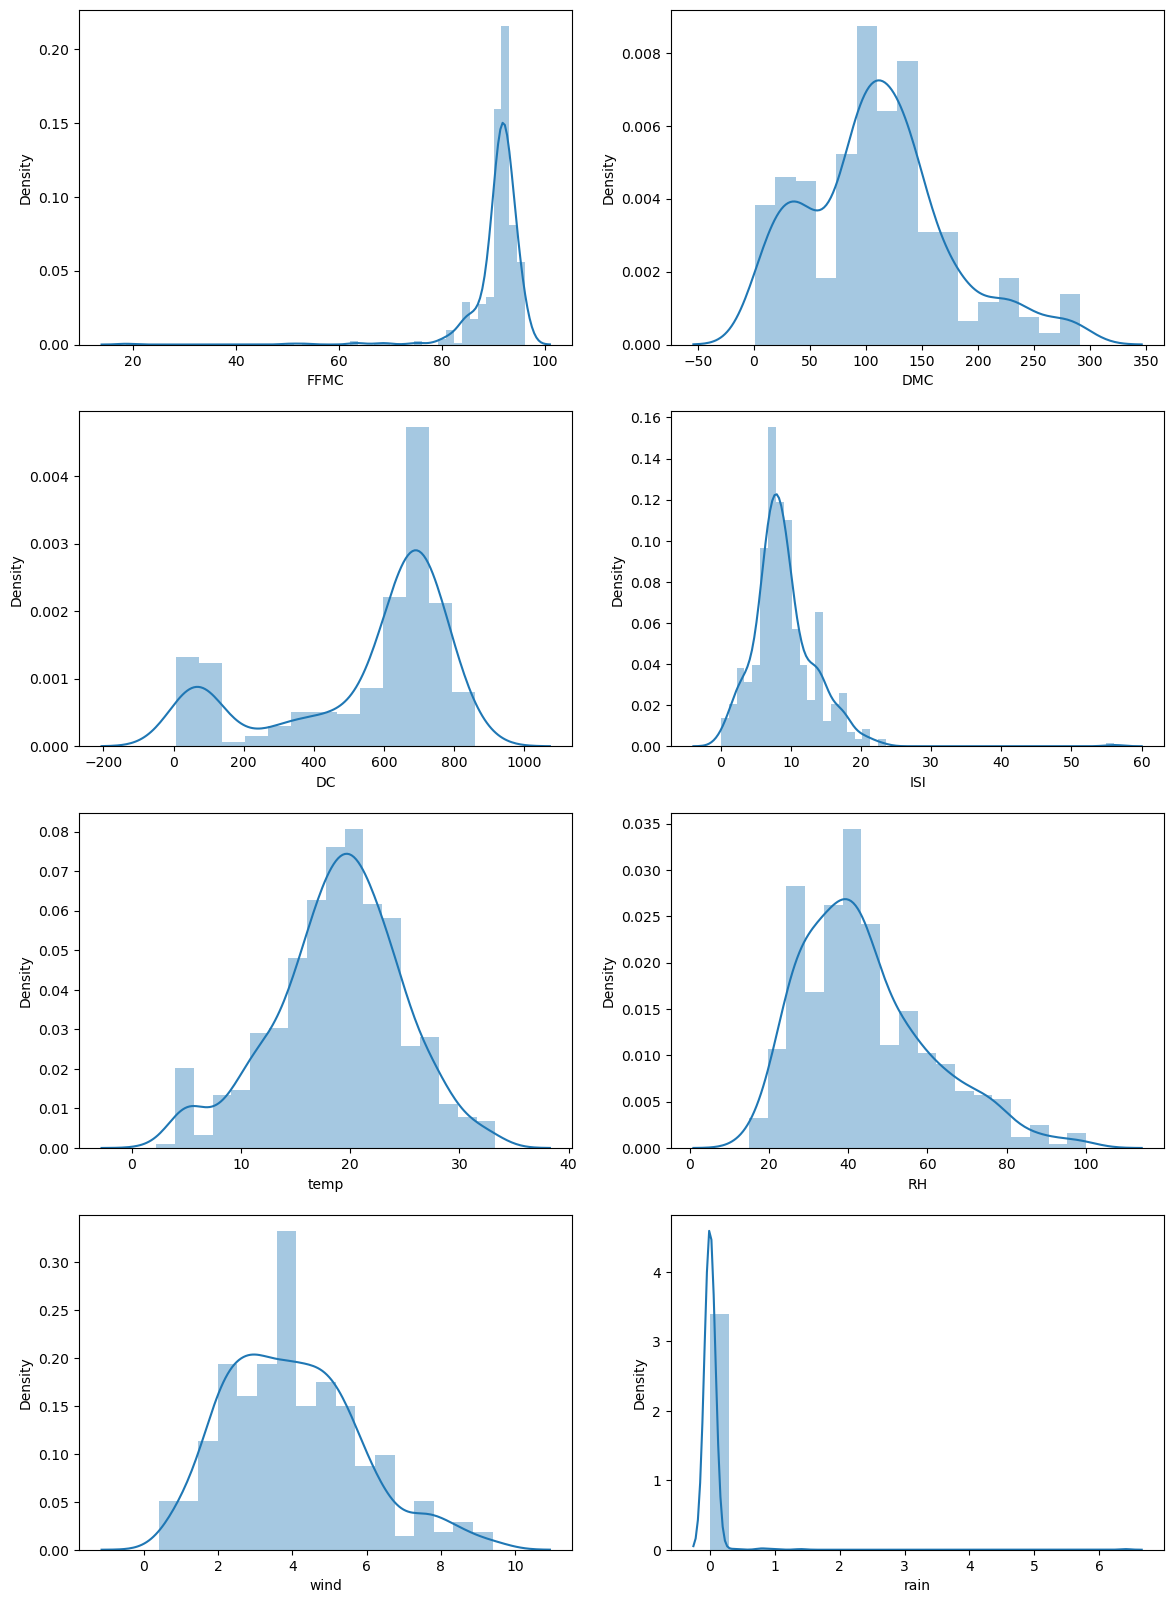

In [19]:
fig, ax = plt.subplots(4,2, figsize = (14,20))

sns.distplot(df.FFMC, ax = ax[0,0])
sns.distplot(df.DMC, ax = ax[0,1])
sns.distplot(df.DC, ax = ax[1,0])
sns.distplot(df.ISI, ax = ax[1,1])
sns.distplot(df.temp, ax = ax[2,0])
sns.distplot(df.RH, ax = ax[2,1])
sns.distplot(df.wind, ax = ax[3,0])
sns.distplot(df.rain, ax = ax[3,1])
plt.show()

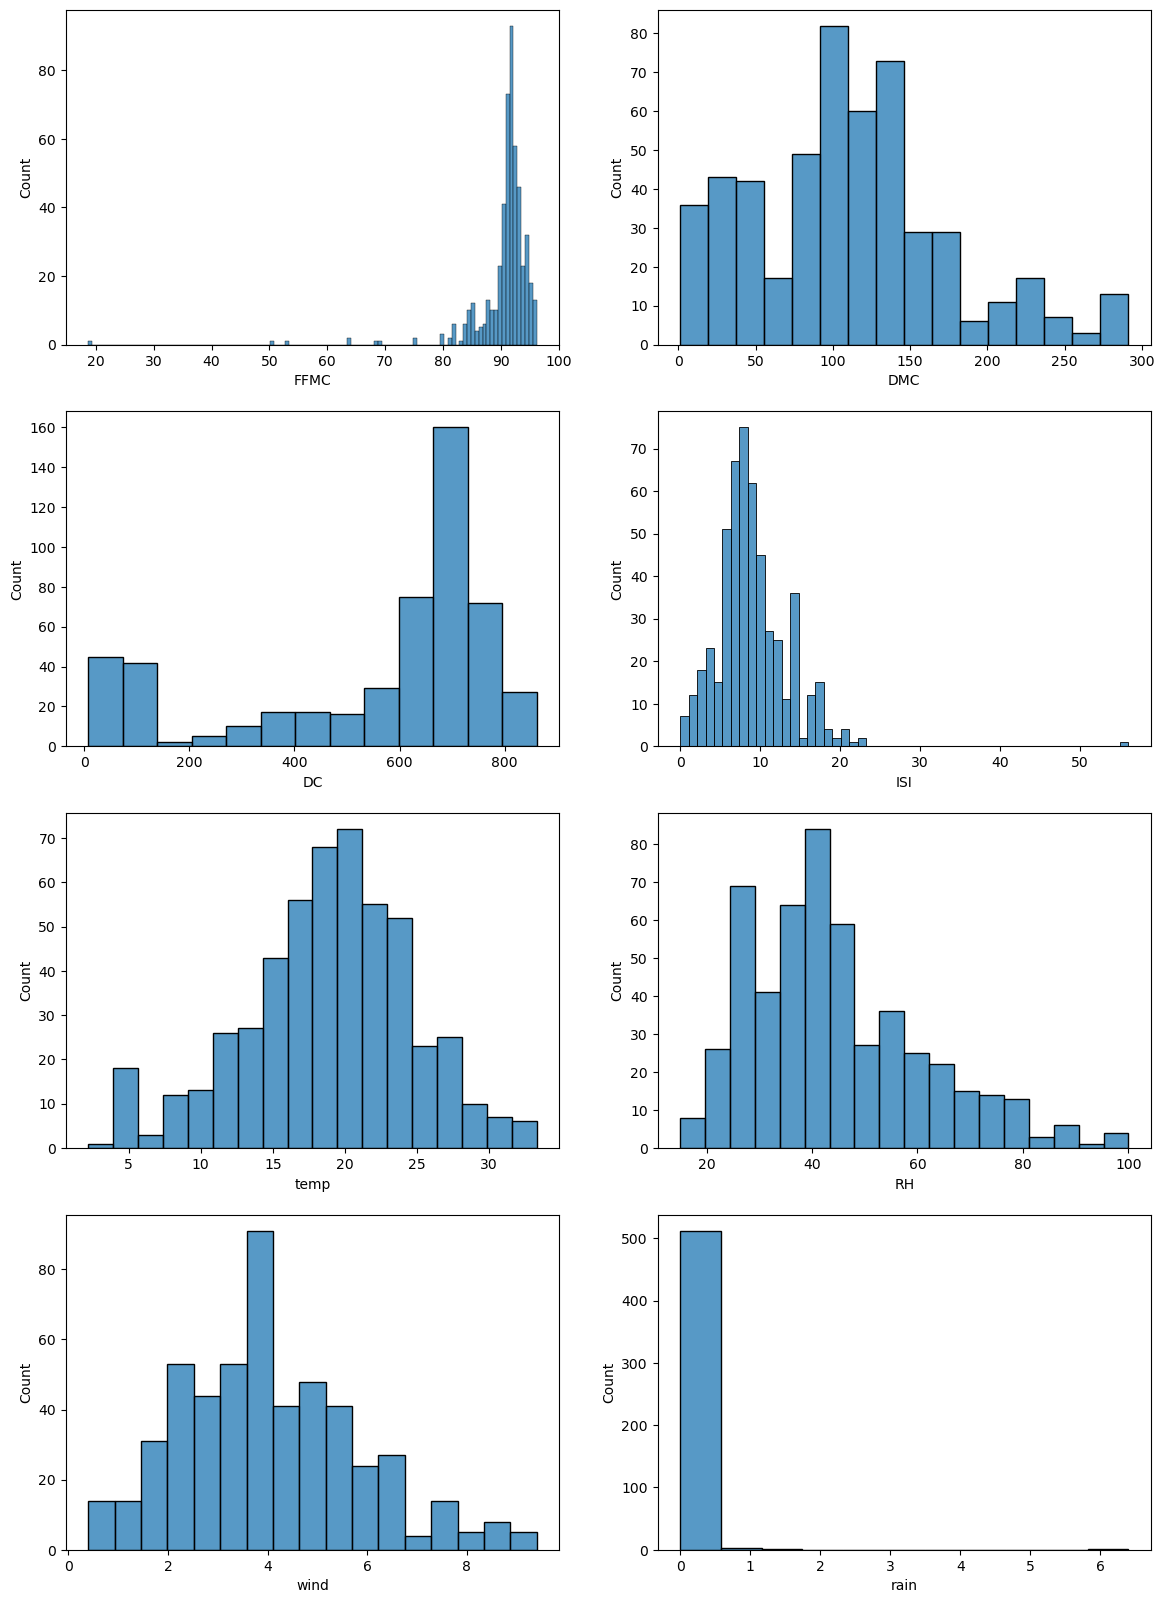

In [20]:
fig, ax = plt.subplots(4,2, figsize = (14,20))

sns.histplot(df.FFMC, ax = ax[0,0])
sns.histplot(df.DMC, ax = ax[0,1])
sns.histplot(df.DC, ax = ax[1,0])
sns.histplot(df.ISI, ax = ax[1,1])
sns.histplot(df.temp, ax = ax[2,0])
sns.histplot(df.RH, ax = ax[2,1])
sns.histplot(df.wind, ax = ax[3,0])
sns.histplot(df.rain, ax = ax[3,1])

plt.show()

In [21]:
# Detect observations with more than one outlier
def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        Q1 = np.percentile(df[col],25)    # 1st quartile (25%)
        Q3 = np.percentile(df[col],75)    # 3rd quartile (75%)
        IQR = Q3 - Q1                     # Interquartile rrange (IQR)
        
        outlier_step = 1.5 * IQR          # outlier step
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[continuous_feature]))))

The dataset contains 3 observations with more than 2 outliers


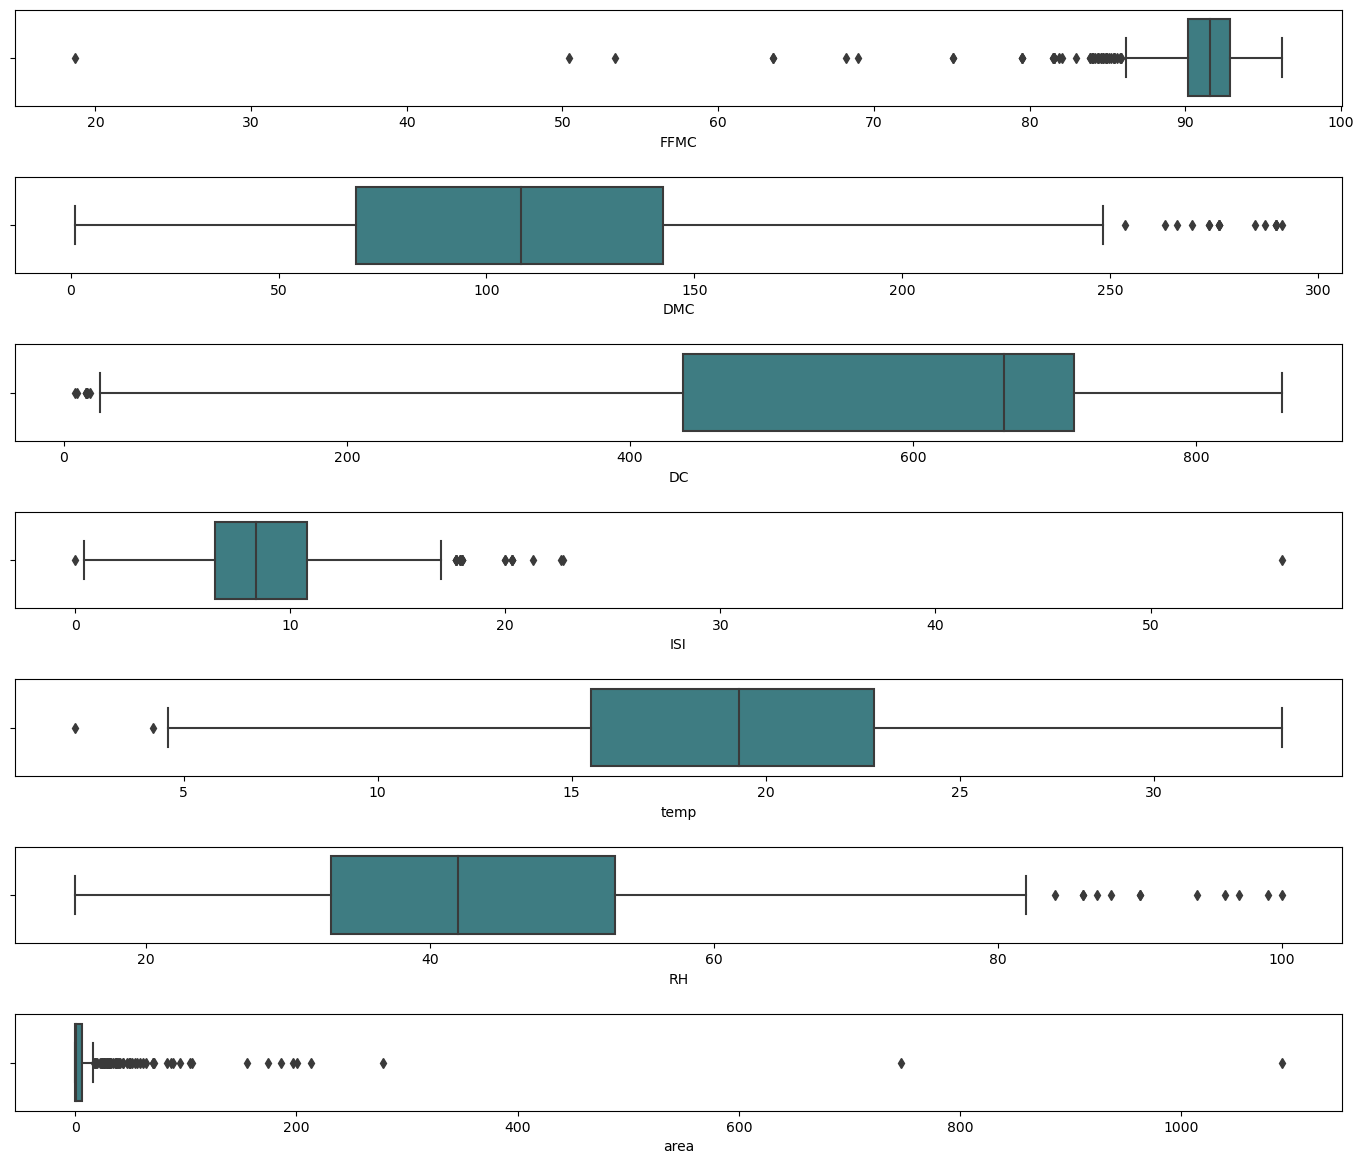

In [22]:
outlier = df.copy() 
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='area',data=outlier,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

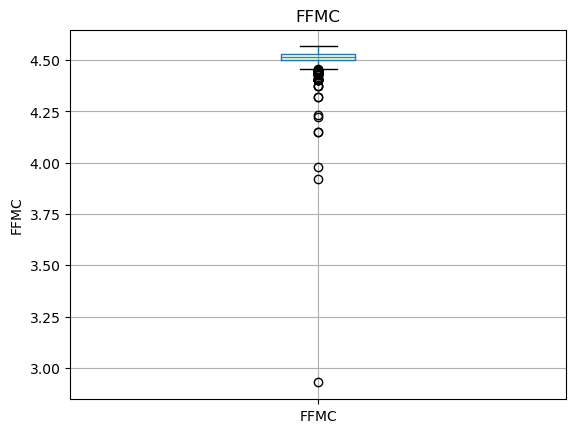

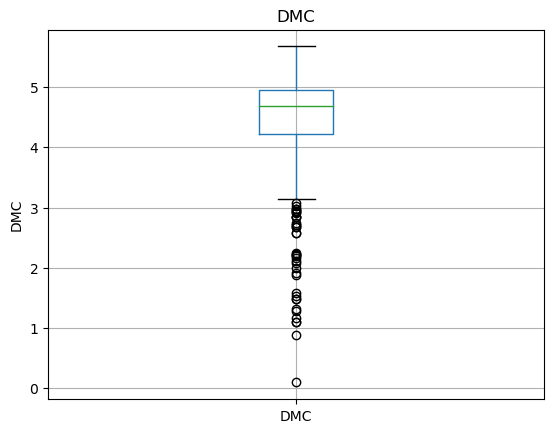

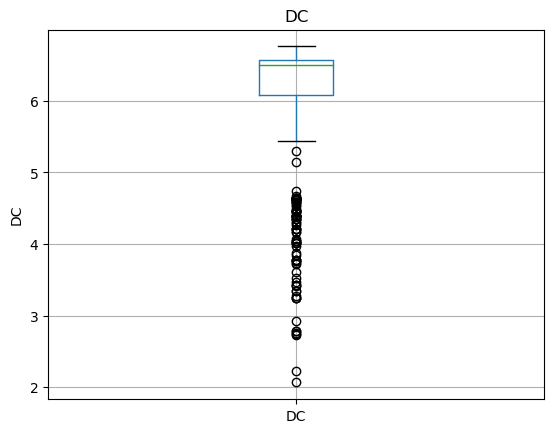

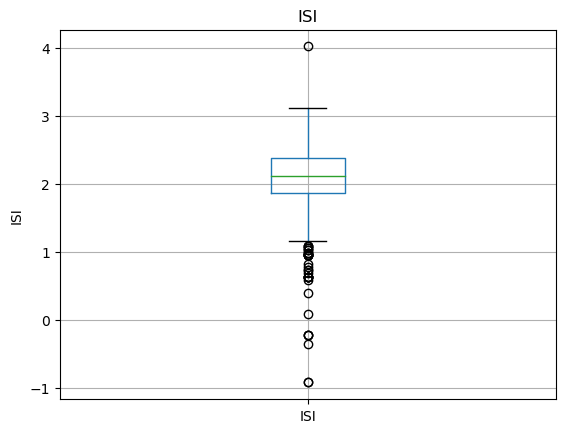

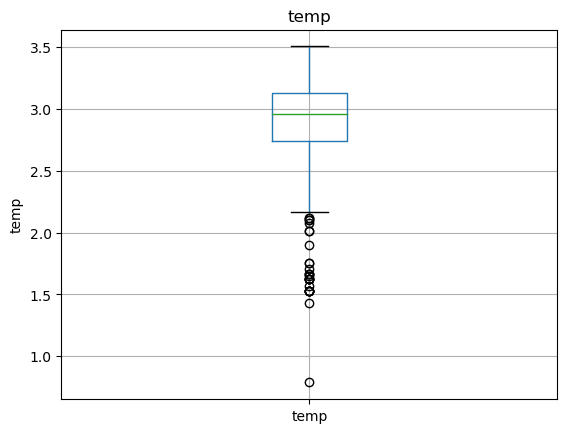

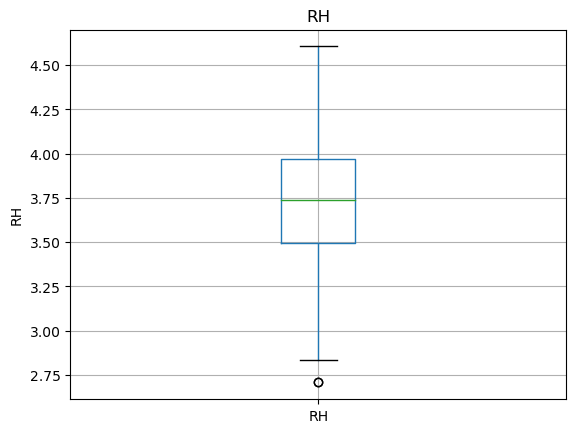

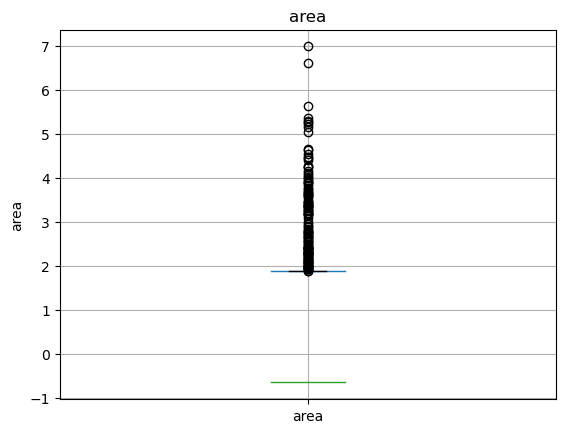

In [23]:
for feature in continuous_feature:
    data = df.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


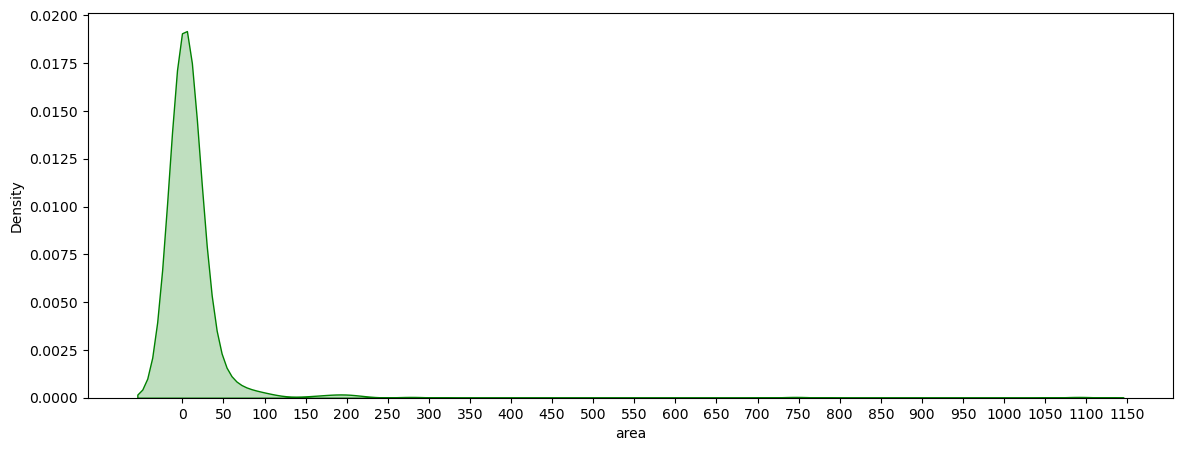

In [24]:
plt.figure(figsize=(14,5))
print("Skew: {}".format(df['area'].skew()))
print("Kurtosis: {}".format(df['area'].kurtosis()))
ax = sns.kdeplot(df['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

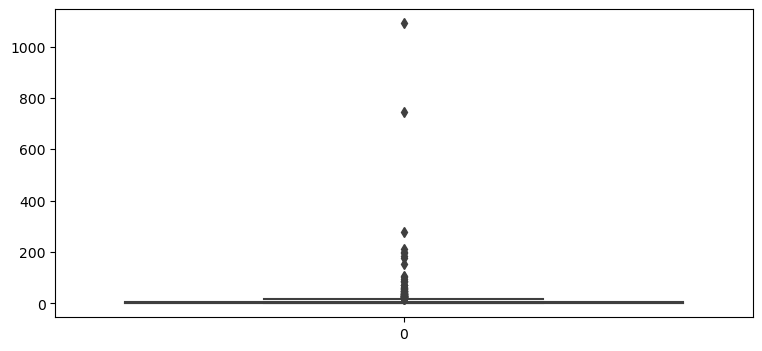

In [25]:
plt.figure(figsize=(9,4))
sns.boxplot(df['area']);

In [26]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
df[categorical_features].head()

Number of Categorical Features: 3 
 ['month', 'day', 'size_category']


,month,day,size_category
0,mar,fri,small
1,oct,tue,small
2,oct,sat,small
3,mar,fri,small
4,mar,sun,small


In [27]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(df[feature].unique()),feature))

12 number of unique categories in feature named month
7 number of unique categories in feature named day
2 number of unique categories in feature named size_category


In [28]:
for feature in df.columns:
    if df[feature].dtypes == 'object':      # in pandas it is object
        unique_cat = len(df[feature].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=feature, unique_cat=unique_cat))
        print(df[feature].value_counts())
        print()

Feature 'month' has 12 unique categories
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

Feature 'day' has 7 unique categories
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

Feature 'size_category' has 2 unique categories
small    378
large    139
Name: size_category, dtype: int64



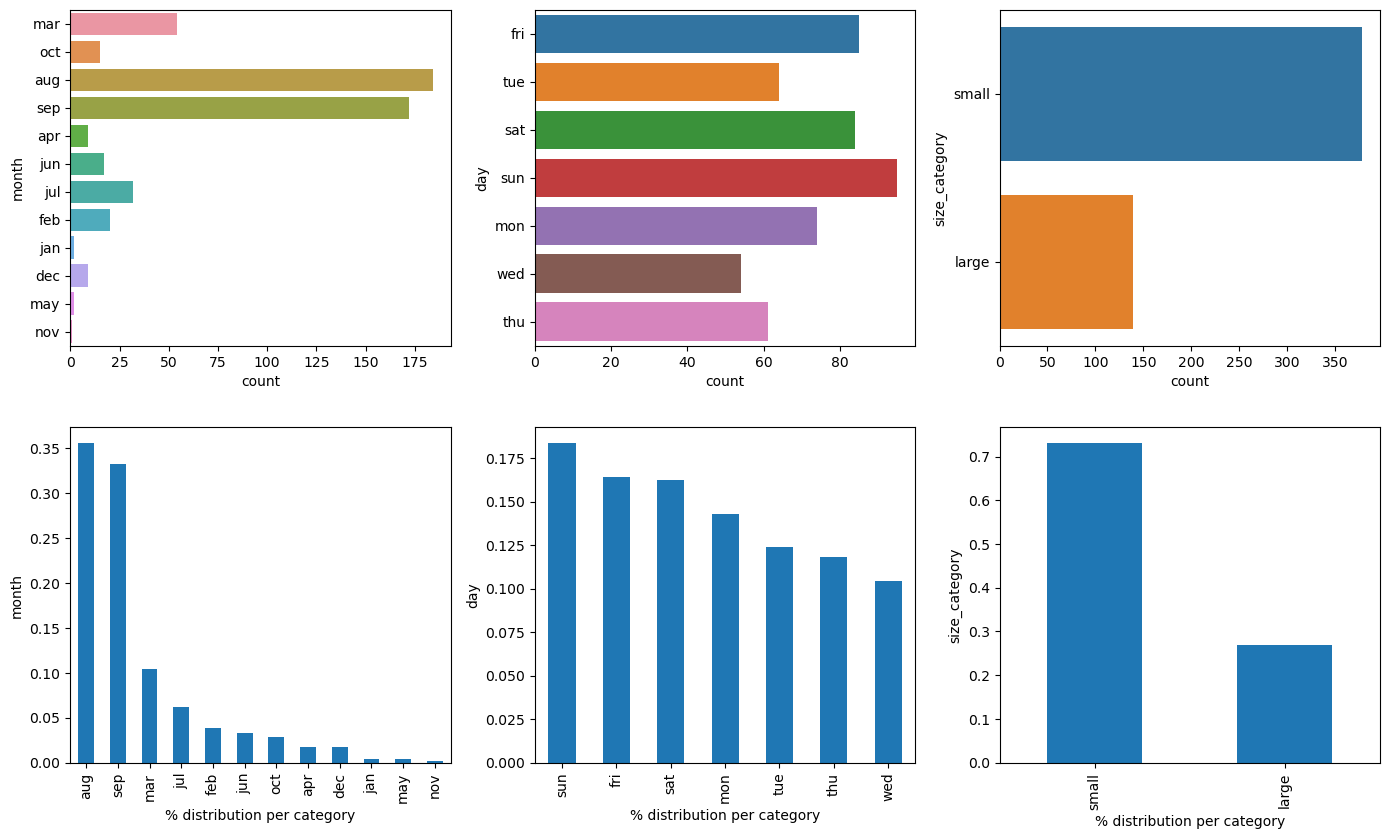

In [29]:
plt.figure(figsize=(14,12))
for i,col in enumerate(categorical_features,1):
    plt.subplot(3,3,i)
    sns.countplot(data = df,y=col)
    plt.subplot(3,3,i+3)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [30]:
print(df['area'].describe(),'\n')
# A categorical variable based on forest fire area damage
# No damage, low, moderate, high, very high

df1 = df.copy()
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df1['damage_category'] = df1['area'].apply(area_cat)
df1.head()

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64 



,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,damage_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,small,No damage
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,1,0,small,No damage
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,1,0,small,No damage
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,small,No damage
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,1,0,0,0,0,small,No damage


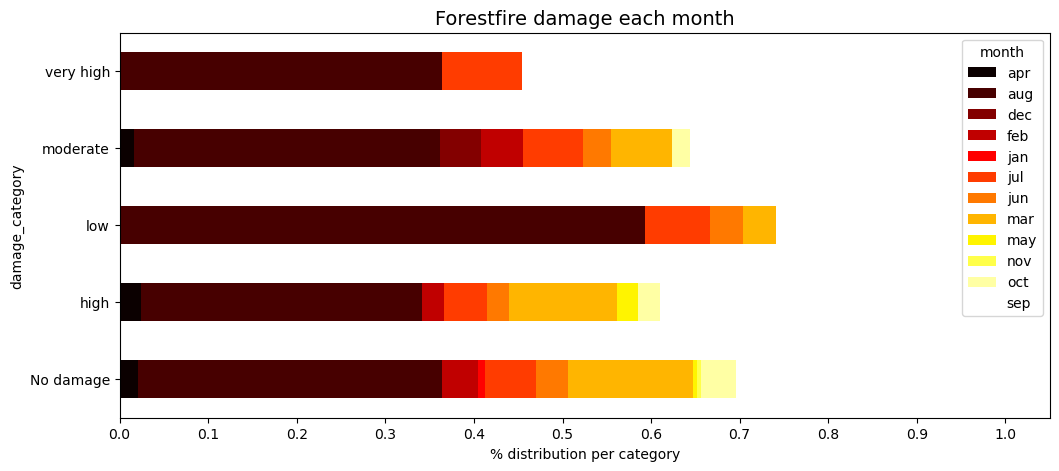

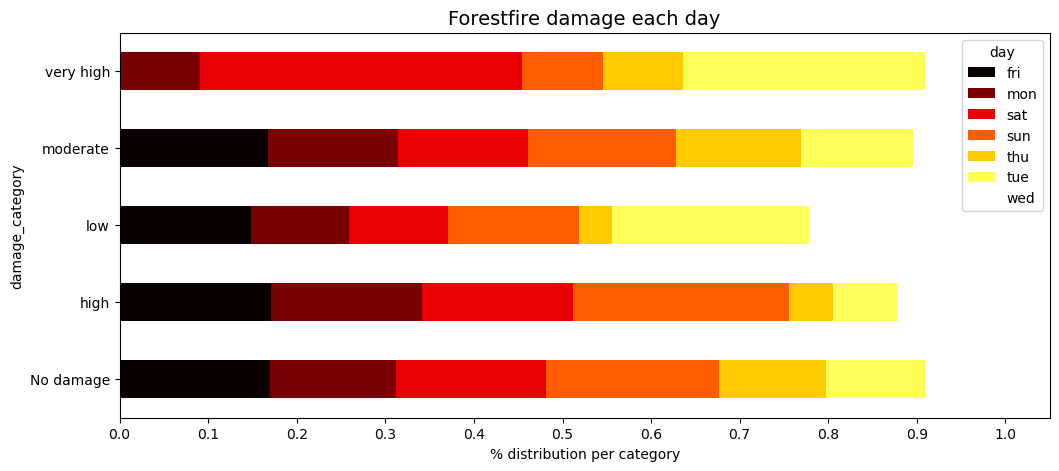

In [31]:
for col in categorical_features:
    if col!="size_category":
        cross = pd.crosstab(index=df1['damage_category'],columns=df1[col],normalize='index')
        cross.plot.barh(stacked=True,cmap='hot',figsize=(12,5))
        plt.xlabel('% distribution per category')
        plt.xticks(np.arange(0,1.1,0.1))
        plt.title("Forestfire damage each {}".format(col), fontsize=14)
        
plt.show()

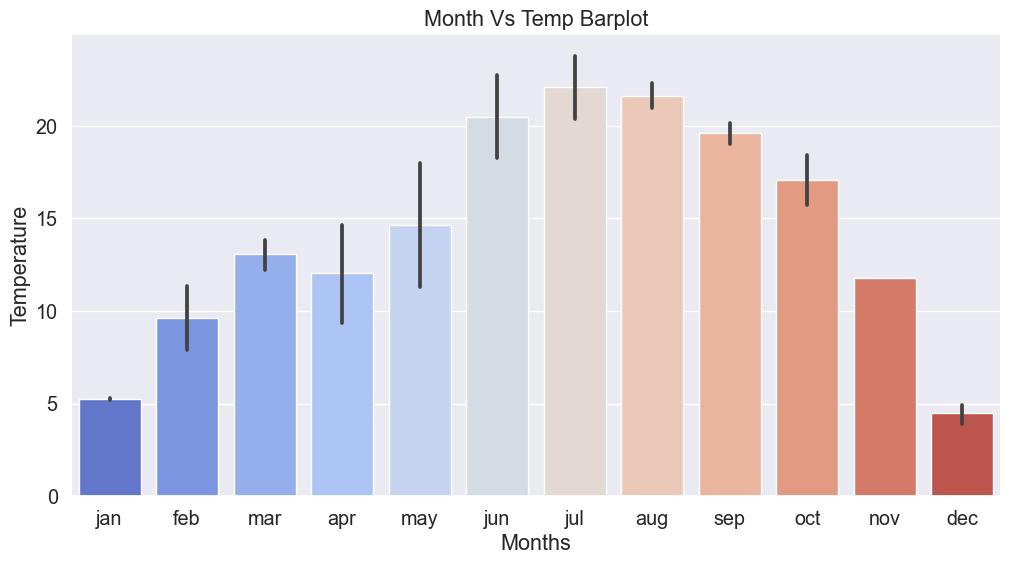

In [32]:
plt.rcParams['figure.figsize'] = [12,6]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = df,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'coolwarm')
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature");

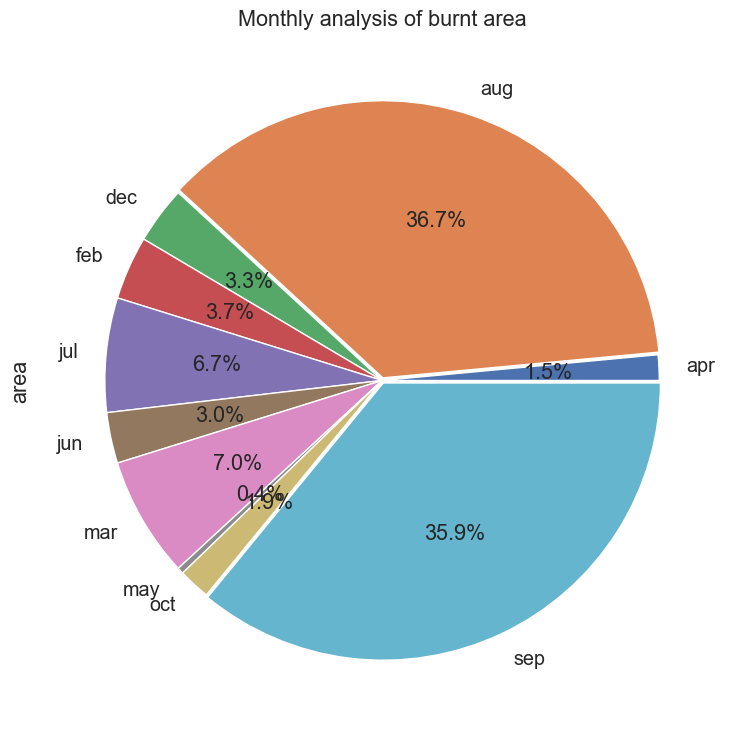

In [33]:
areaburnt = df[df['area']>0]
areaburnt.groupby('month')['area'].agg('count').plot(kind='pie',title='Monthly analysis of burnt area',figsize=(9,9),explode=[0,0.01,0,0,0,0,0,0,0,0.01],autopct='%0.1f%%')
plt.show()

In [34]:
df1 = df.copy()
order = {'month':{'jan':'January','feb':'February','mar':'March','apr':'April','may':'May','jun':'June','jul':'July','aug':'August','sep':'September','oct':'October','nov':'November','dec':'December'}}
df1 = df1.replace(order)

count_month_response_pct = pd.crosstab(df1['size_category'],df1['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(df1['month'].value_counts())
month['% Small Forest Fire'] = count_month_response_pct['small']
month['% Large Forest Fire'] = count_month_response_pct['large']
month['index'] = [8,9,3,7,2,6,10,4,12,1,5,11]
month = month.sort_values('index',ascending = True)
month.drop('index', axis=1,inplace=True)
month

,month,% Small Forest Fire,% Large Forest Fire
January,2,100.000000,0.000000
February,20,70.000000,30.000000
March,54,77.777778,22.222222
April,9,77.777778,22.222222
May,2,50.000000,50.000000
June,17,82.352941,17.647059
July,32,71.875000,28.125000
August,184,76.630435,23.369565
September,172,70.348837,29.651163
October,15,73.333333,26.666667


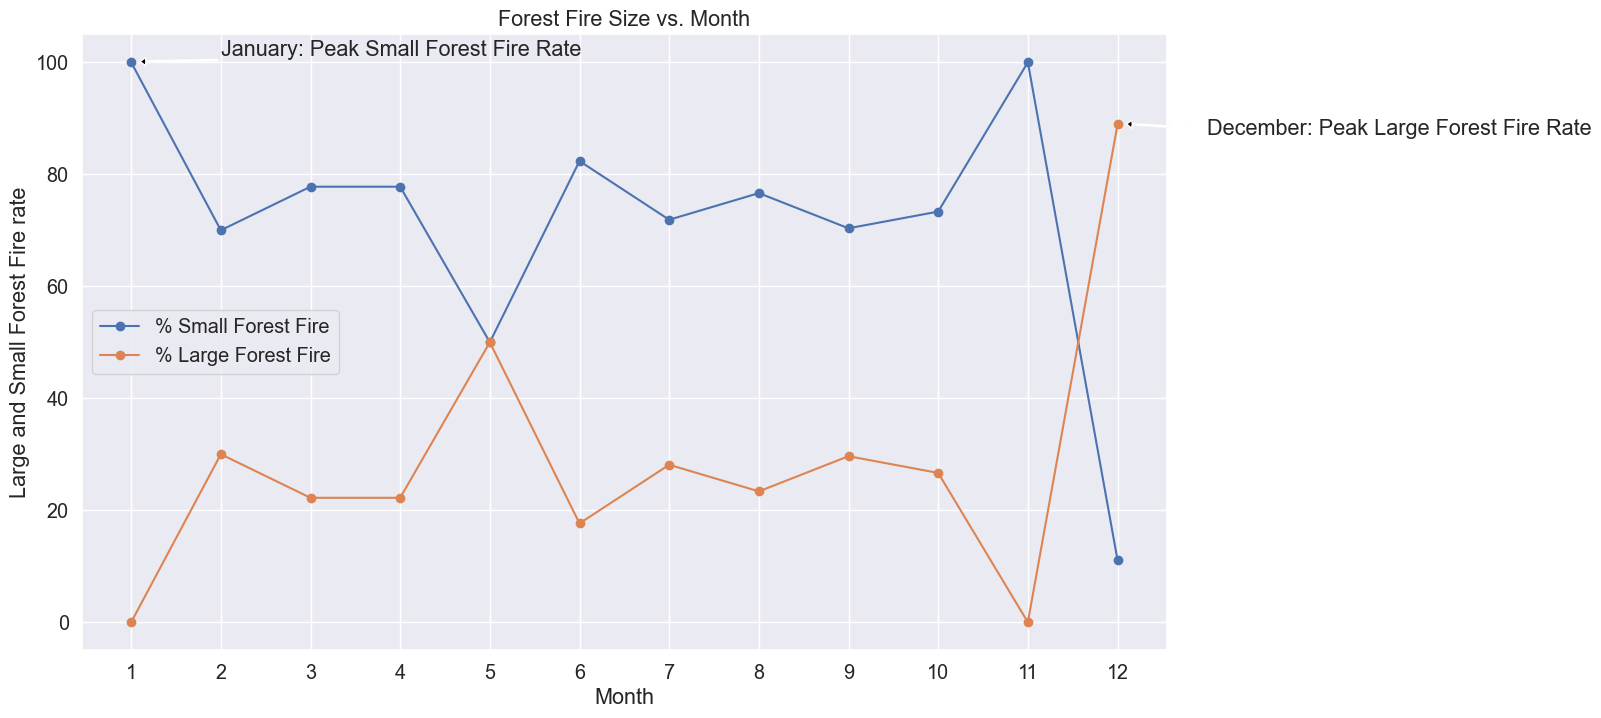

In [35]:
df1 = df.copy()
order = {'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
df1 = df1.replace(order)

count_month_response_pct = pd.crosstab(df1['size_category'],df1['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(df1['month'].value_counts())
month['% Small Forest Fire'] = count_month_response_pct['small']
month['% Large Forest Fire'] = count_month_response_pct['large']
month['Month'] = ['August','September','March','July','February','June','October','April','December','January','May','November']
month['index'] = [8,9,3,7,2,6,10,4,12,1,5,11]
month = month.sort_values('index',ascending = True)
plot_month = month[['% Small Forest Fire','% Large Forest Fire']].plot(kind ='line', figsize = (14,8), marker = 'o')

plt.title('Forest Fire Size vs. Month')
plt.ylabel('Large and Small Forest Fire rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of Small fire rate
y = month['% Small Forest Fire'].max()
x = month['% Small Forest Fire'].idxmax()
plt.annotate('January: Peak Small Forest Fire Rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: peak of large fire rate
y = month['% Large Forest Fire'].max()
x = month['% Large Forest Fire'].idxmax()
plt.annotate('December: Peak Large Forest Fire Rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()

In [36]:
df.size_category.unique()

array(['small', 'large'], dtype=object)

In [37]:
countsizesmall = len(df[df.size_category == 'small'])
countsizelarge = len(df[df.size_category == 'large'])
print("Percentage of Small Forest Fire Size: {:.2f}%".format((countsizesmall / (len(df.size_category))*100)))
print("Percentage of Large Foreset Fire Size: {:.2f}%".format((countsizelarge / (len(df.size_category))*100)))

Percentage of Small Forest Fire Size: 73.11%
Percentage of Large Foreset Fire Size: 26.89%


In [38]:
df.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

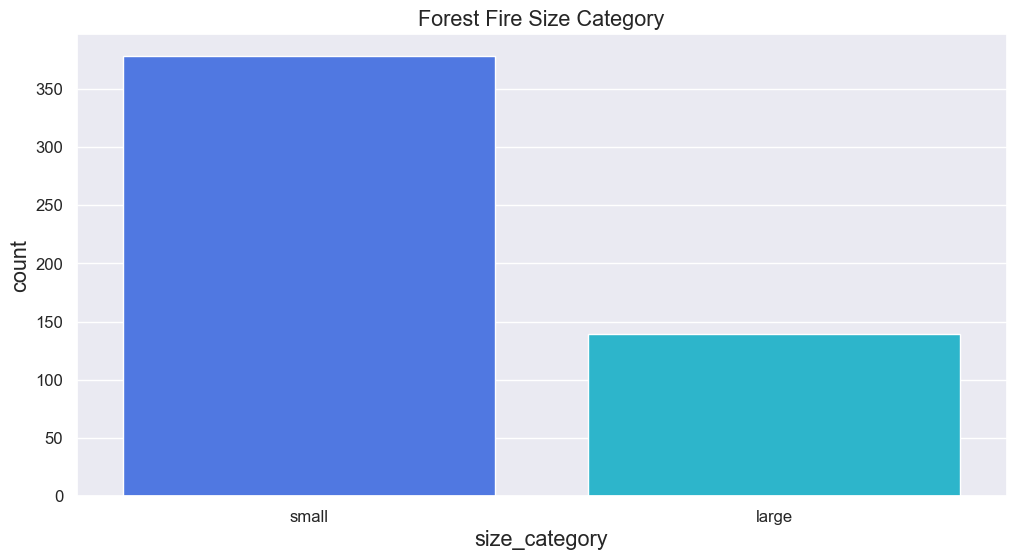

In [39]:
pal = sns.color_palette('rainbow')
sns.countplot(x='size_category', data= df, palette = pal, order= df['size_category'].value_counts().index)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Forest Fire Size Category');

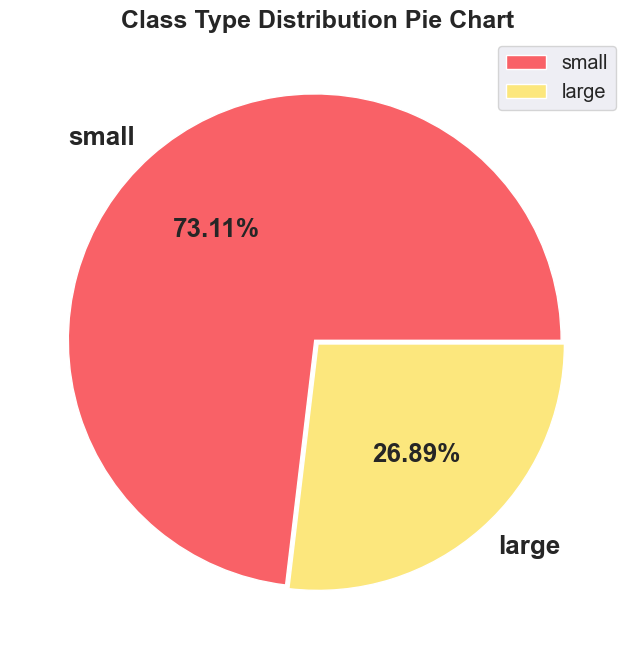

In [40]:
plt.figure(figsize = (8,8))
plt.pie(df['size_category'].value_counts(), labels= df.size_category.unique(),
        explode = [0.02,0.0], autopct= '%.2f%%', colors = ["#F96167", "#FCE77D"],
        textprops = {'size':'large', 'fontweight':'bold',})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

In [41]:
# Encode the categorical features (month and day)
encoder = LabelEncoder()
df['month'] = encoder.fit_transform(df['month'])
df['day'] = encoder.fit_transform(df['day'])

In [43]:
# Split the data into train and test sets
X = df.drop('size_category', axis=1)
y = df['size_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
# Define the neural network model
mlp = MLPClassifier(hidden_layer_sizes=(50,50),activation='relu',alpha=0.0001,max_iter=1000, random_state=42)

In [46]:
# Define the hyperparameters to search
params = {'hidden_layer_sizes': [(100,), (50, 50), (20, 20, 20)],
          'activation': ['relu', 'tanh', 'logistic'],
          'alpha': [0.0001, 0.001, 0.01]}

In [47]:
# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(mlp, params, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000,
                                     random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(100,), (50, 50),
                                                (20, 20, 20)]},
             scoring='accuracy')

In [48]:
# Print the best hyperparameters and the corresponding accuracy
print('Best hyperparameters:', grid_search.best_params_)
y_pred = grid_search.predict(X_test)

Best hyperparameters: {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50)}


In [49]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9615384615384616


#### The above code defines a neural network model using MLPClassifier from the sklearn library. The max_iter parameter is set to 1000, which specifies the maximum number of iterations for the solver to converge. The random_state parameter is set to 42 to ensure reproducibility.
   #### Next, the hyperparameters to search are defined in the params dictionary. The hyperparameters being tuned are the hidden_layer_sizes, activation function, and alpha (regularization parameter).
   #### Then, a grid search is performed using GridSearchCV from sklearn. The cross-validation parameter cv is set to 5, which performs 5-fold cross-validation. The n_jobs parameter is set to -1 to use all available processors for parallel processing. The scoring parameter is set to 'accuracy' to evaluate the performance of the model based on the accuracy metric.
   #### After performing the grid search, the best hyperparameters are printed. Finally, the accuracy of the model is evaluated using the test data and printed out.
   #### The grid search helps to find the best combination of hyperparameters that maximizes the accuracy of the model. This ensures that the model is well-optimized and can generalize well on new data.
   #### An accuracy of 0.9615384615384616 means that the model predicted the correct output for 96.15% of the samples in the test set. This is a good accuracy score, indicating that the neural network model was able to effectively learn and generalize from the training data to make accurate predictions on new, unseen data.


## same data set using Sequential model

In [50]:
import pandas as pd
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [52]:
df1=pd.read_csv('forestfires.csv')

In [54]:
df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [55]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1["size_category"]=le.fit_transform(df1["size_category"])

In [56]:
x=df1.iloc[:,2:10]
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [57]:
y=df1.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [58]:
from sklearn.model_selection import train_test_split
X_Tr, X_T, Y_Tr, Y_T = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [59]:
# create model
model = Sequential()
model.add(Dense(20, input_dim=8,  activation='relu')) #1st layer
model.add(Dense(10,  activation='relu')) #2nd layer
model.add(Dense(1, activation='sigmoid')) #output layer

In [60]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [74]:
# Fit the model
h = model.fit(X_Tr, Y_Tr, validation_split=0.2, epochs=70, batch_size=32)

# evaluate the model on train data
scores = model.evaluate(X_Tr, Y_Tr)
print(model.metrics_names[1], scores[1]*100)

Epoch 1/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6323 - loss: 0.7630 - val_accuracy: 0.7470 - val_loss: 0.7627
Epoch 2/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6831 - loss: 0.8118 - val_accuracy: 0.7590 - val_loss: 0.6630
Epoch 3/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7043 - loss: 0.6611 - val_accuracy: 0.7711 - val_loss: 0.5992
Epoch 4/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6738 - loss: 0.6715 - val_accuracy: 0.7711 - val_loss: 0.6191
Epoch 5/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7003 - loss: 0.6235 - val_accuracy: 0.7470 - val_loss: 0.6650
Epoch 6/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6530 - loss: 0.7536 - val_accuracy: 0.7470 - val_loss: 0.6703
Epoch 7/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6415 - loss: 0.7193 - val_accuracy: 0.7349 - val_loss: 0.5933
Epoch 8/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7156 - loss: 0.6574 - val_accuracy: 0.7470 - val_loss

Epoch 52/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7264 - loss: 0.6969 - val_accuracy: 0.7470 - val_loss: 0.6318
Epoch 53/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7047 - loss: 0.6584 - val_accuracy: 0.4699 - val_loss: 0.8768
Epoch 54/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6210 - loss: 0.7032 - val_accuracy: 0.7470 - val_loss: 0.5839
Epoch 55/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7687 - loss: 0.5702 - val_accuracy: 0.7470 - val_loss: 0.5925
Epoch 56/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7169 - loss: 0.6074 - val_accuracy: 0.7711 - val_loss: 0.5741
Epoch 57/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7110 - loss: 0.6394 - val_accuracy: 0.7470 - val_loss: 0.9176
Epoch 58/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6655 - loss: 0.8518 - val_accuracy: 0.7470 - val_loss: 0.8774
Epoch 59/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6432 - loss: 0.6978 - val_accuracy: 0.7590 - 

In [75]:
from sklearn.feature_selection import mutual_info_regression

In [76]:
# feature extraction
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(X_T, Y_T)

In [77]:
# summarize scores
scores = fit.scores_

features = fit.transform(x)

In [78]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
2,0.055023,DC
7,0.049063,rain
1,0.006239,DMC
6,0.000398,wind
0,0.000000,FFMC
3,0.000000,ISI
4,0.000000,temp
5,0.000000,RH


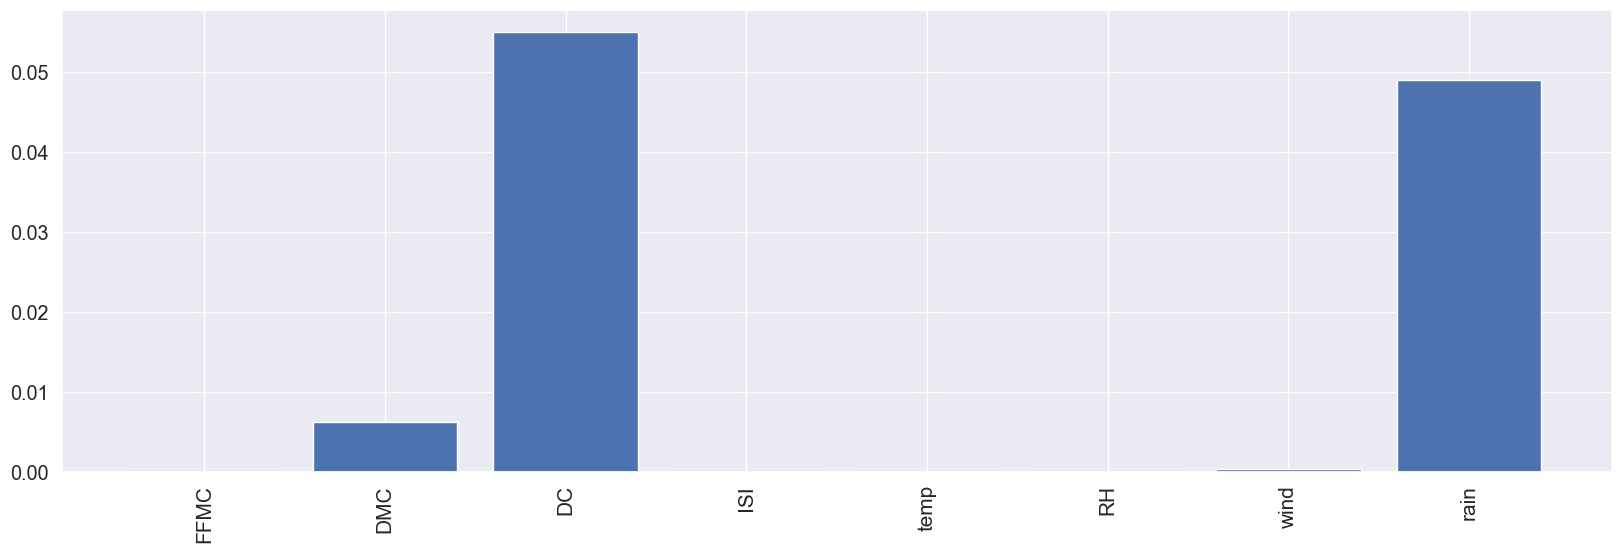

In [79]:
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7])
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

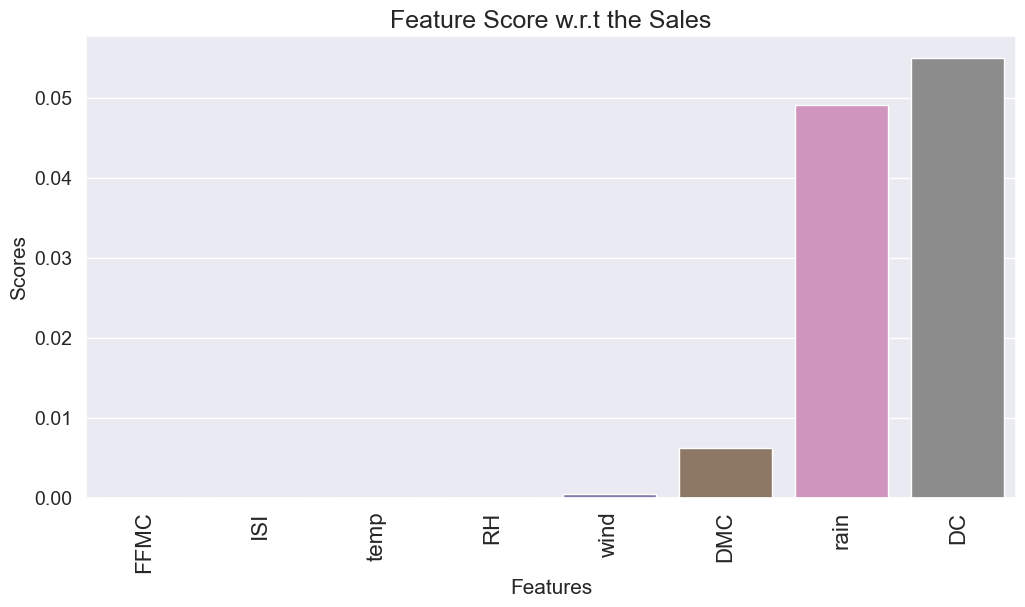

In [80]:
plt.figure(figsize=(12,6))
# make barplot and sort bars
sns.barplot(x='Feature', y="Score", data=score_df, order=score_df.sort_values('Score').Feature)
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [81]:
h.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

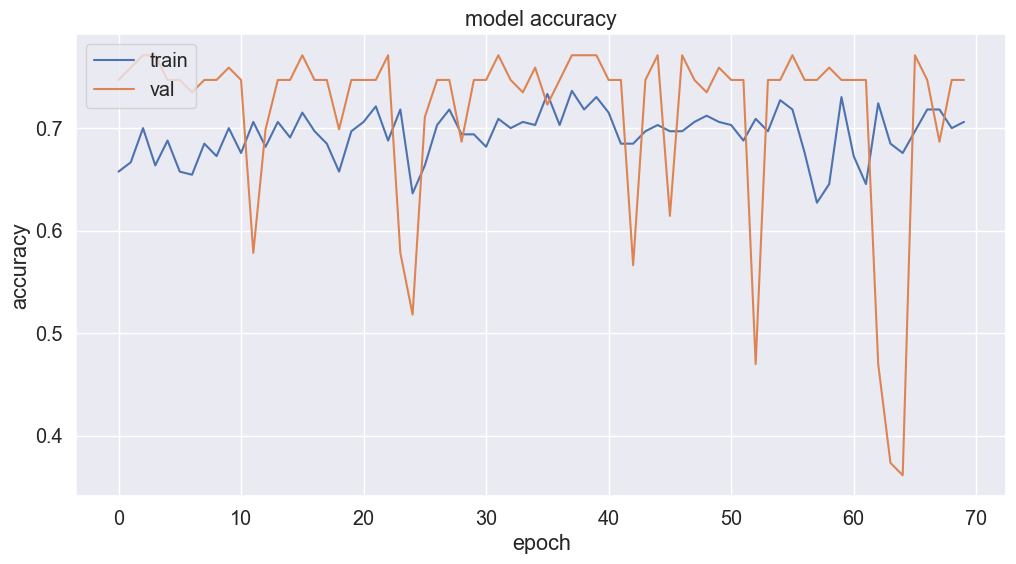

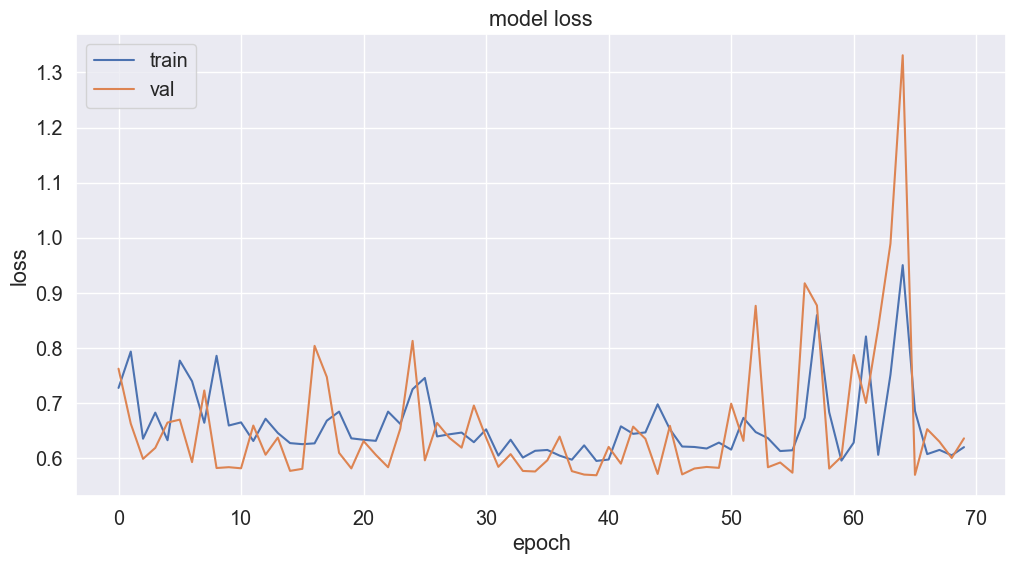

In [82]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [83]:
# evaluate the model on test data
scores =model.evaluate(X_T, Y_T)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6790 - loss: 0.7958 
compile_metrics: 69.23%
